In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# 1. Data exploration and Preprocessing

In [2]:
df= pd.read_csv('Customer_data - customer_data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### 1. Handling missing values, Outlier treatment and Trend analysis
### 2. Data cleaning, feature engineering, and transformations. 

## Handling Missing Values

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.dropna(subset=['TotalCharges'],inplace=True)
# Dropping the null rows for Total charges column

In [9]:
df.isnull().sum()
# Handled all missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Outliers Treatment

In [10]:
num_cols= df.dtypes[df.dtypes!=object].index
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [11]:
# Senior Citizen column is a binary column that specify if the customer is a senior citizen or not.
# It only has 0 and 1 values. 
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

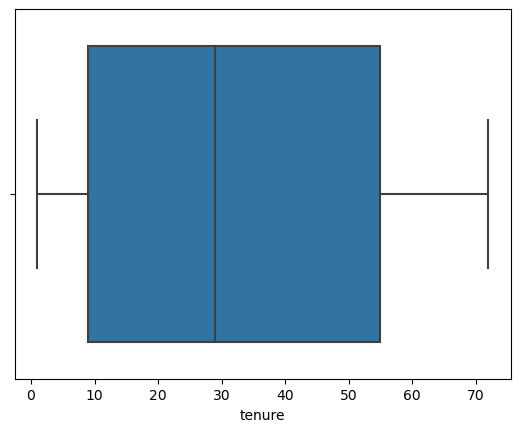

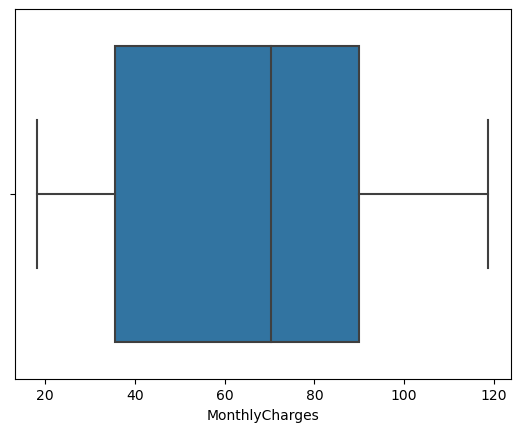

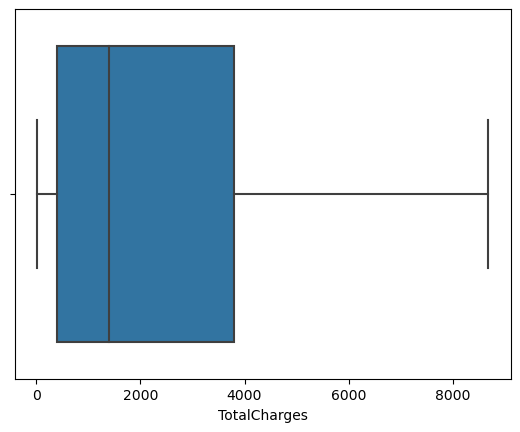

In [12]:
# No Outliers
for col in num_cols:
    if col != 'SeniorCitizen':
        sns.boxplot(data= df, x=col)
        plt.show()

## Trend Analysis

In [13]:
cat_cols= df.dtypes[df.dtypes==object].index
cat_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

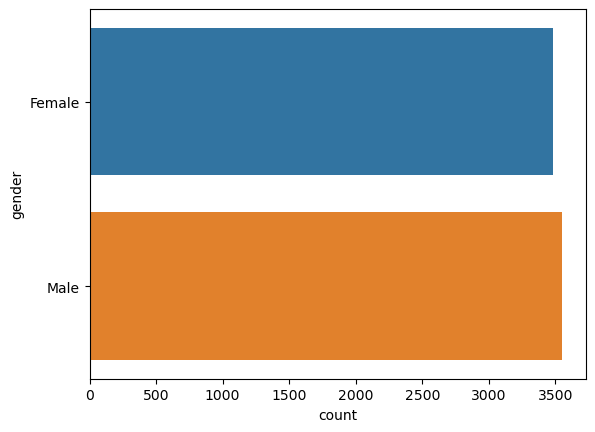

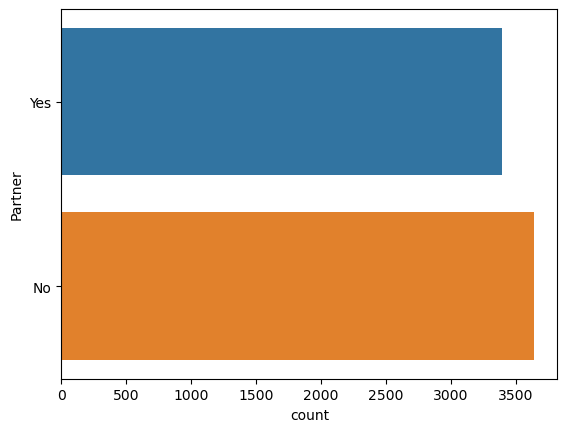

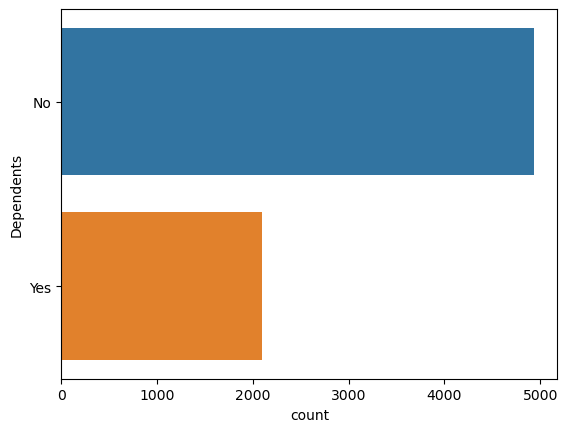

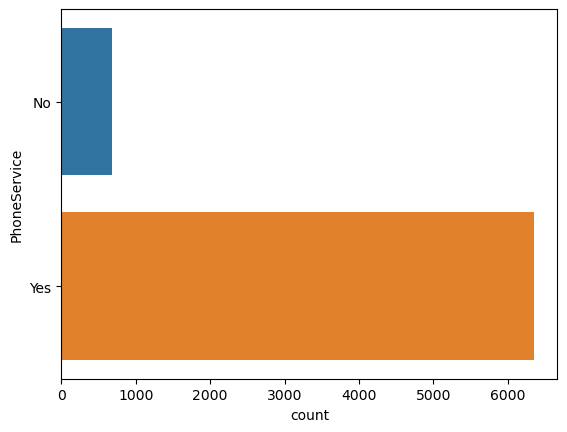

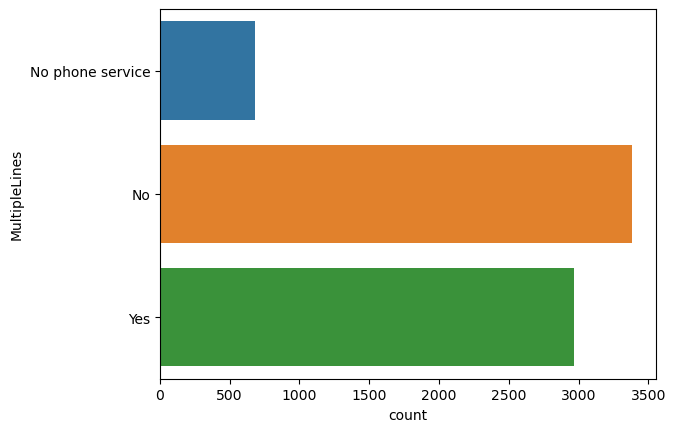

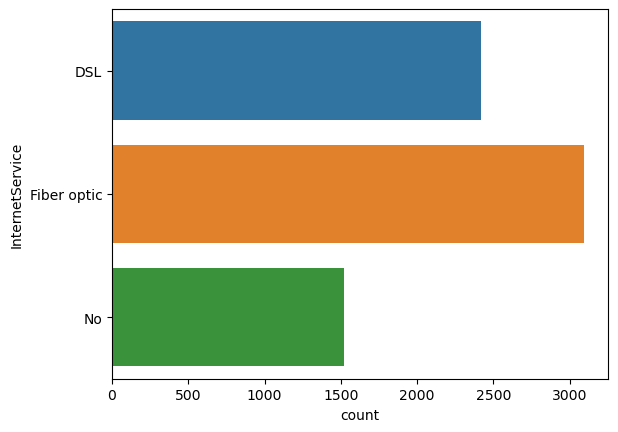

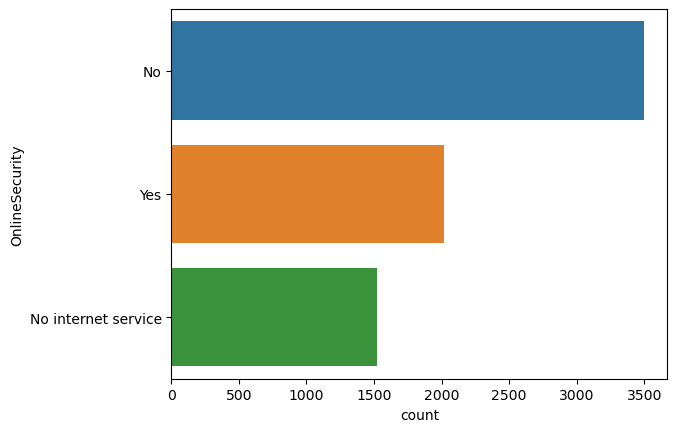

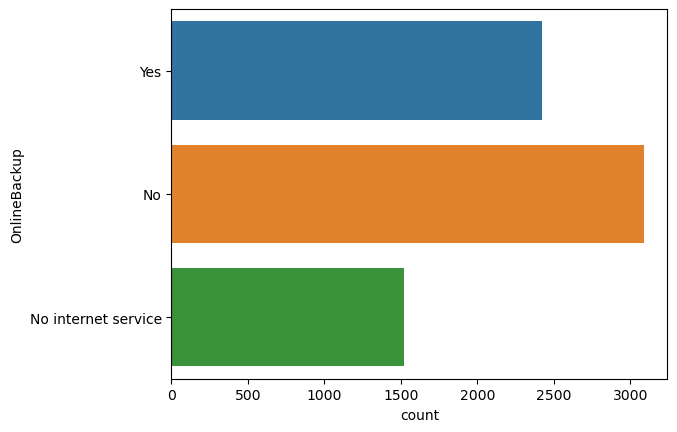

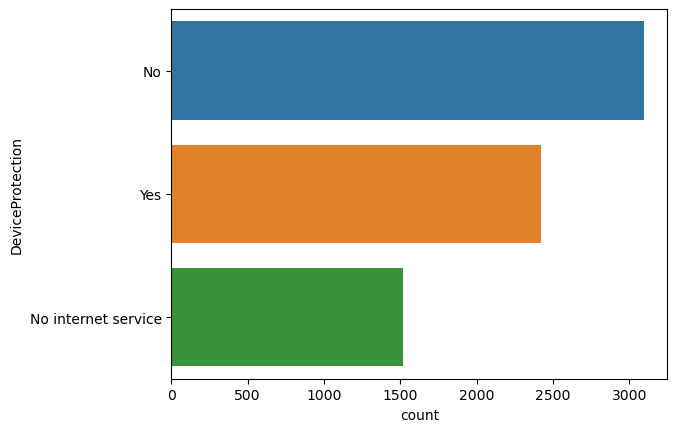

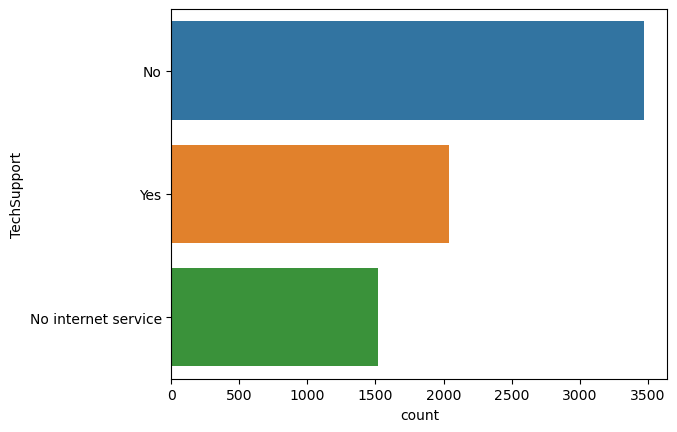

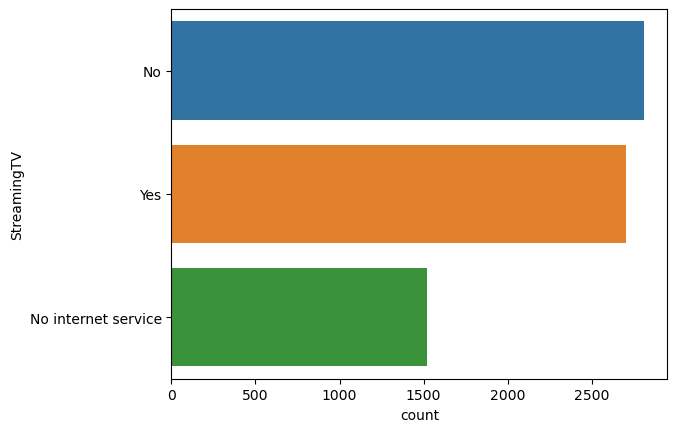

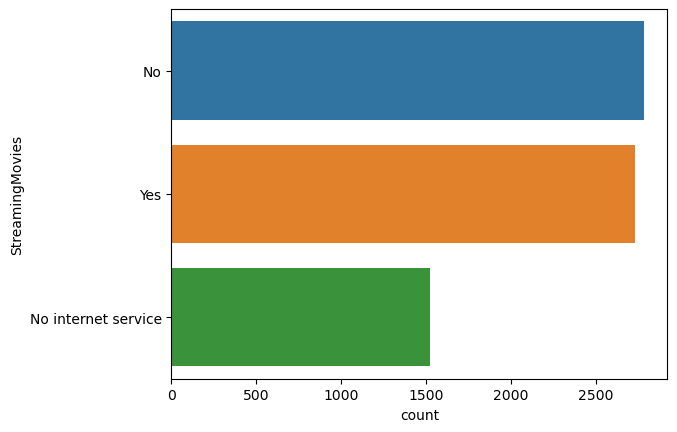

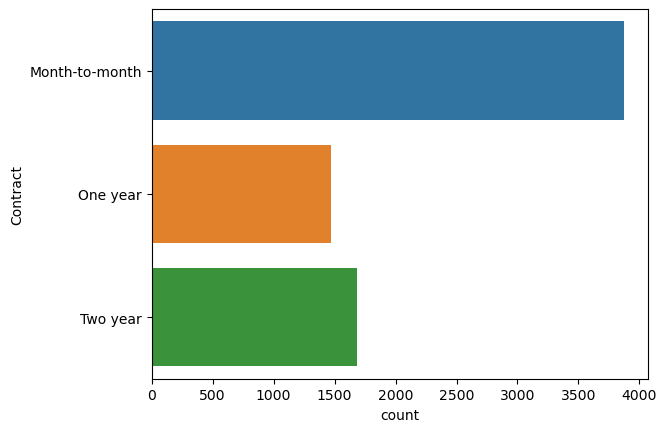

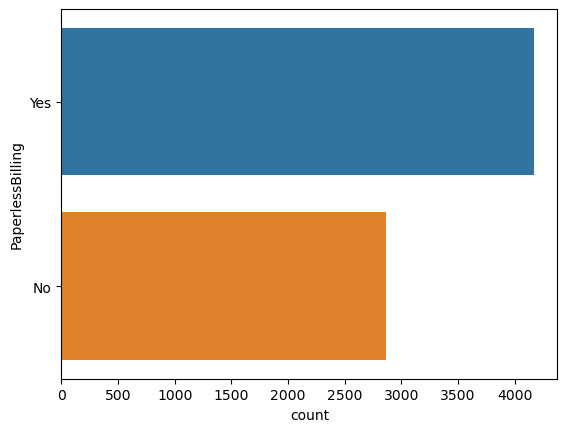

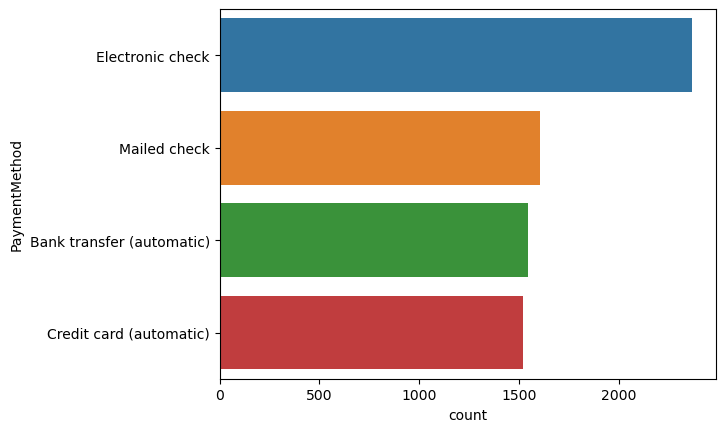

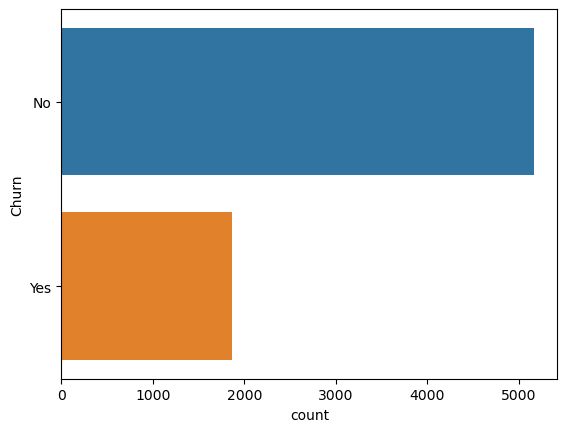

In [14]:
# CustomerID column is a unique identifier column that contains unique values which will not provide any predictive insight.
for col in cat_cols:
    if col != 'customerID':
        sns.countplot(data= df, y= col)
        plt.show()

# These plots show the trend in categorical columns about the different categories, 
# that which category is dominating in each column.

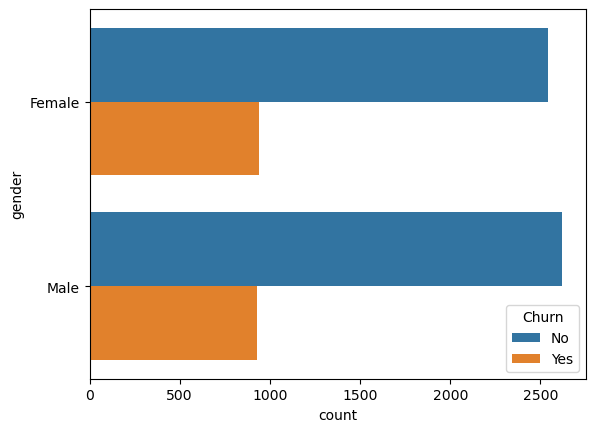

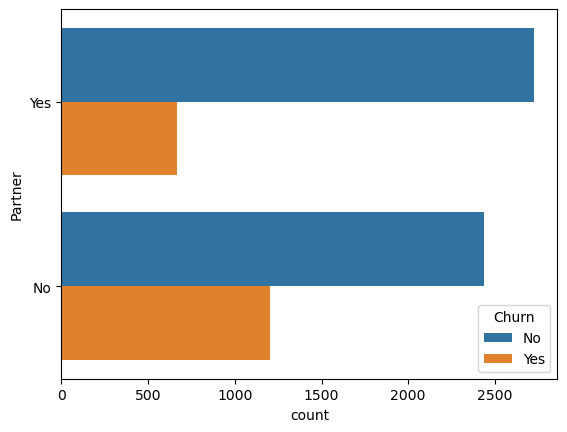

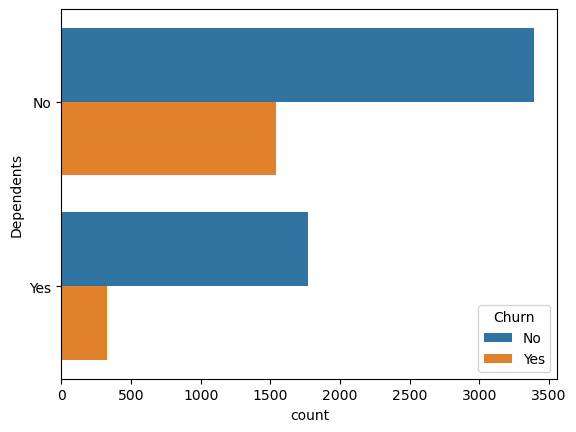

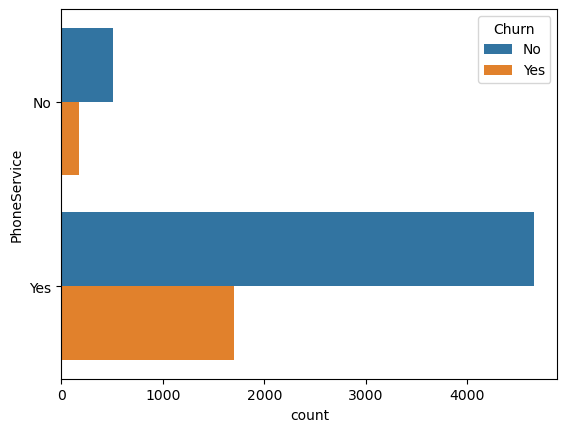

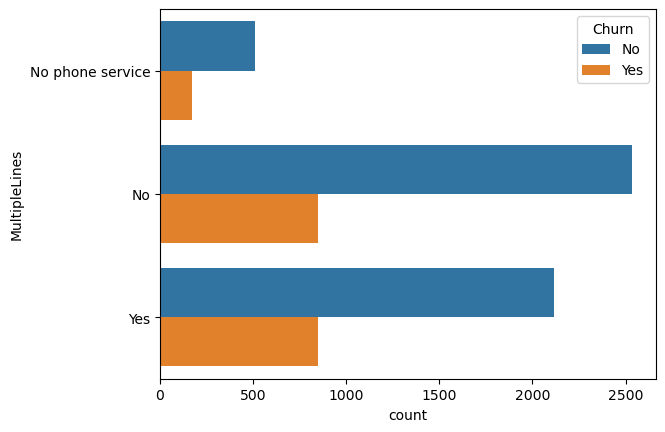

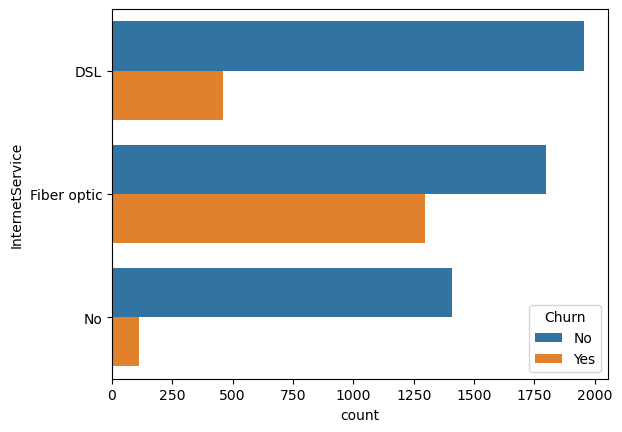

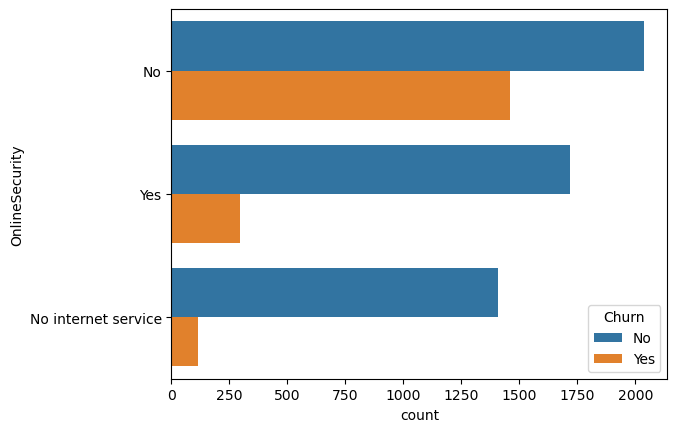

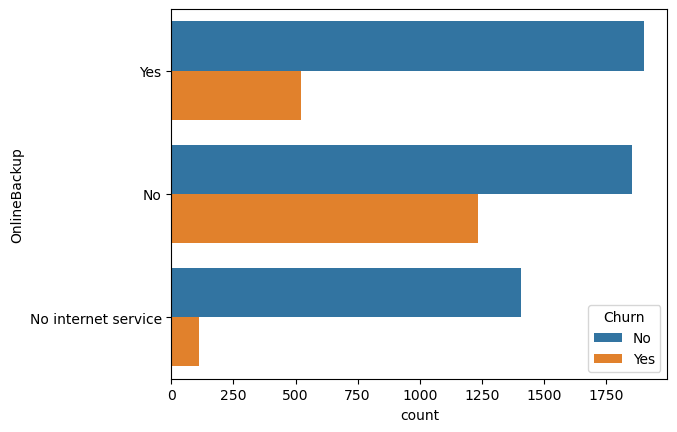

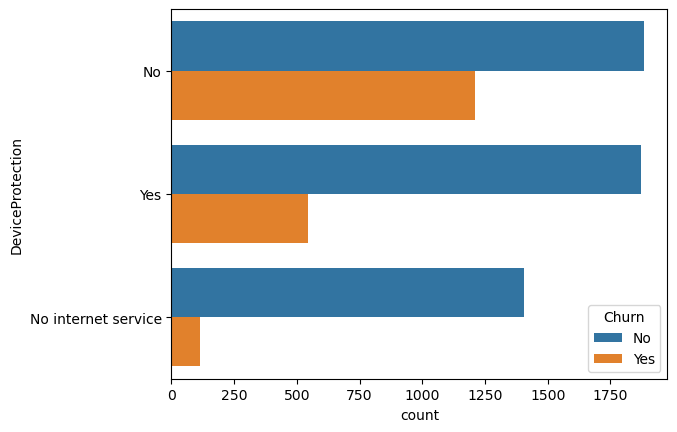

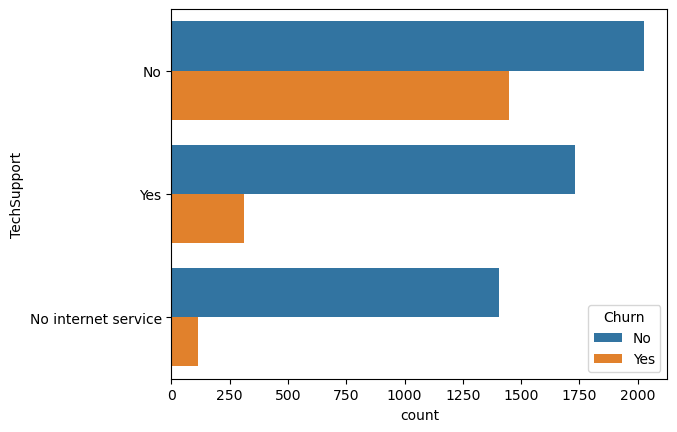

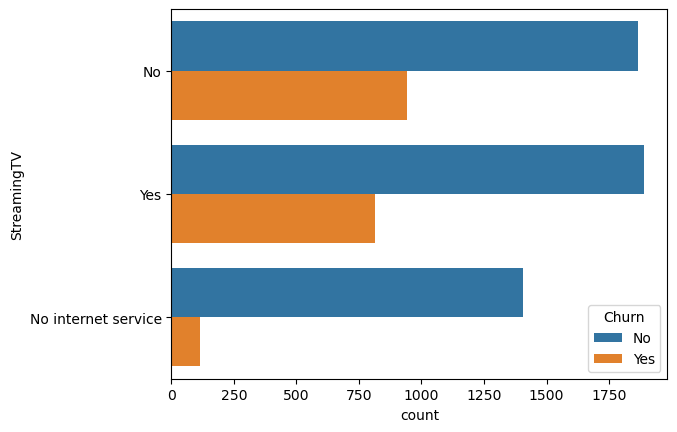

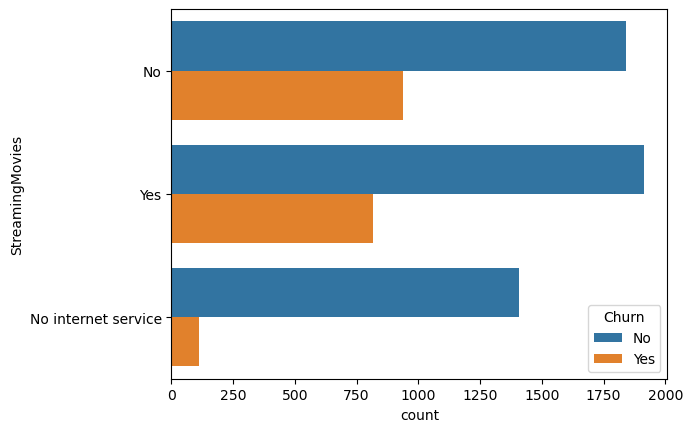

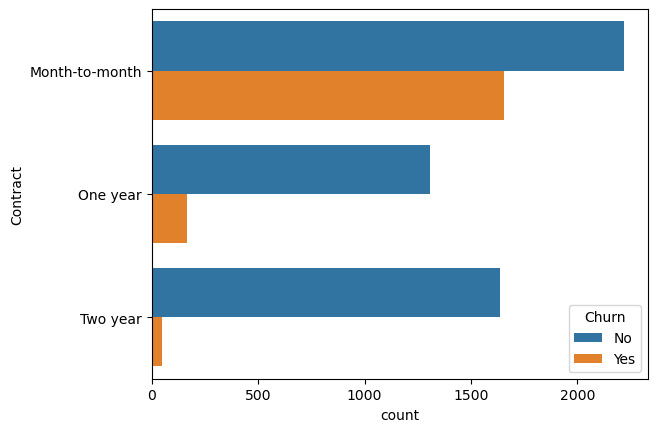

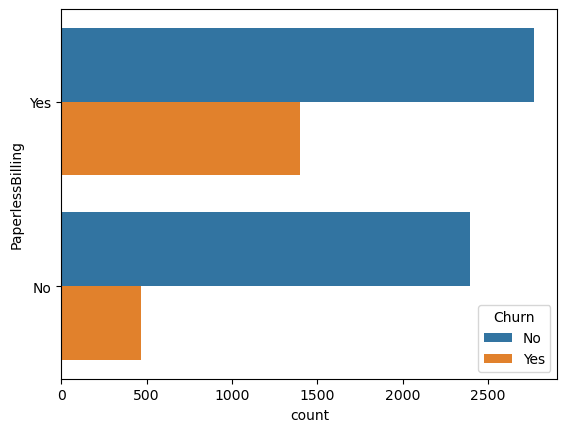

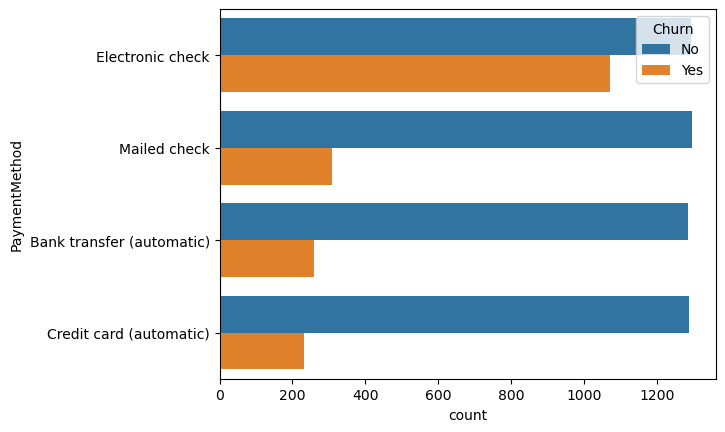

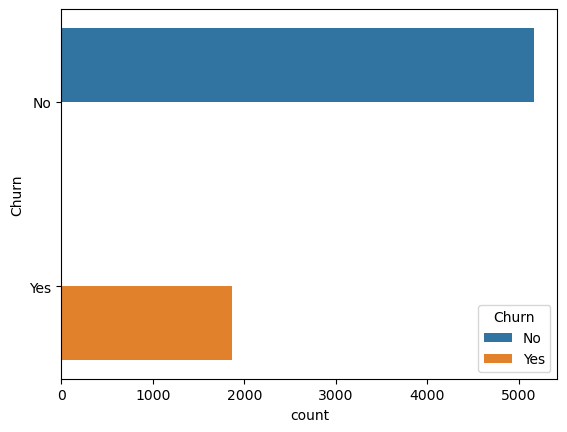

In [15]:
# Checking the trend for all the categorical columns over the churn column.
for col in cat_cols:
    if col != 'customerID':
        sns.countplot(data= df, y= col, hue= 'Churn')
        plt.show()

# Gender is the only column that is not showing any conclusive trend over the Churn column.

## Label Encoding

In [16]:
cat_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [17]:
# Only the categorical columns that can give a predictive insight are encoded.
cols_to_encode = ['Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [18]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cols_to_encode:
    df[col]= lb.fit_transform(df[col])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [19]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [20]:
# Dropping the inconclusive columns that will not contribute to predictions.
df.drop(columns= ['customerID','gender'],inplace= True)

In [21]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

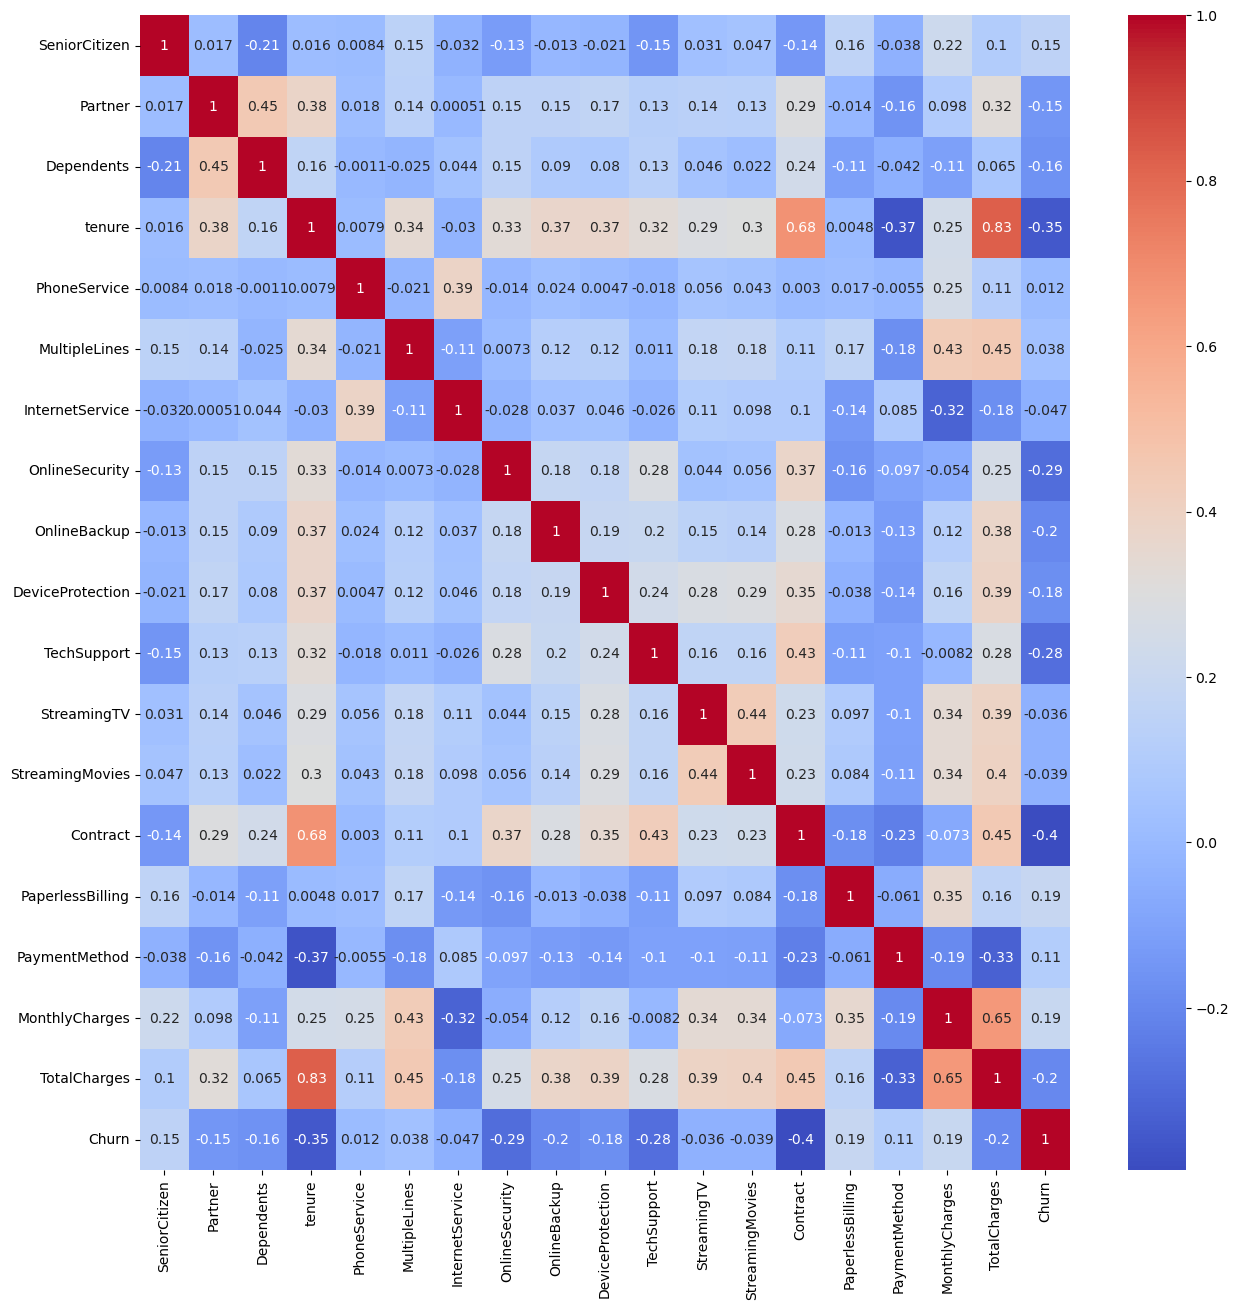

In [22]:
# Checking the correlation between all the numeric columns to compare with the target variable that is Churn. 
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.rc('ytick', labelsize=15)
plt.show()

# 2. Model Development

### Splitting the data into training and testing sets

In [23]:
# Defining the target variable and independent variables
x=df.drop('Churn', axis=1)
y=df['Churn']
print(x.shape)
print(y.shape)

(7032, 18)
(7032,)


In [24]:
#Splitting the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5274, 18)
(1758, 18)
(5274,)
(1758,)


### Logistic Regression Model 

In [25]:
m1 = LogisticRegression()
m1.fit(x_train,y_train)

C:\Users\Hardik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Decision Tree Model

In [26]:
params = {'criterion':['gini','entropy'],
'min_samples_split':[10,15,20,25],
'max_depth':[5,11,15,18]}

dt=DecisionTreeClassifier()
gs = GridSearchCV(dt,param_grid=params,scoring='accuracy',cv=5)
gs.fit(x_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [5, 11, ...], 'min_samples_split': [10, 15, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


### Random Forest Model

In [27]:
n_estimators = [2, 6, 7, 5]
max_features = [2,3,4,5]
bootstrap = [True,False]

param_grid1 = {'n_estimators':n_estimators,
'max_features':max_features,
'bootstrap':bootstrap}

rf = RandomForestClassifier()

grid = GridSearchCV(rf,param_grid1)
grid.fit(x_train,y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [2, 6, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,6


### SVM Model

In [28]:
svm_param_grid = {
'C': [0.1,1,10], #Regularization Parameter
'kernel': ['rbf'], #Kernel type to be used
'gamma': ['scale'] #kernel coefficient for 'rbf', 'poly', 'sigmoid'
}

svm = SVC()
svm_grid_search = GridSearchCV( svm, svm_param_grid, cv=5, scoring = 'accuracy')

svm_grid_search.fit(x_train,y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale'], 'kernel': ['rbf']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


# 3. Model Evaluation

### Logistic Regression Model Evaluation

In [29]:
# Accuracy score
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))
# There is no significant difference between training and testing accuracy.
# So no signs of overfitting.

Training Score 0.8050815320439894
Testing Score 0.78839590443686


In [30]:
ypred_m1 = m1.predict(x_test)

In [31]:
cm_m1 = confusion_matrix(y_test,ypred_m1)
print(cm_m1)
print(classification_report(y_test,ypred_m1))
# Created a confusion matrix that shows the evaluation metrics for both categories Churn(1) and Not Churn(2).

[[1156  144]
 [ 228  230]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.61      0.50      0.55       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



### Decision Tree Model Evaluation

In [32]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}

In [33]:
print("Training Score",gs.score(x_train,y_train))
print("Testing Score",gs.score(x_test,y_test))
# There is no significant difference between training and testing accuracy.
# So no signs of overfitting. 

Training Score 0.7986348122866894
Testing Score 0.7844141069397043


In [34]:
predictions = gs.predict(x_test)

In [35]:
cm_gs = confusion_matrix(y_test,predictions)
print(cm_gs)
print(classification_report(y_test,predictions))
# Created a confusion matrix that shows the evaluation metrics for both categories Churn(1) and Not Churn(2).

[[1176  124]
 [ 255  203]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1300
           1       0.62      0.44      0.52       458

    accuracy                           0.78      1758
   macro avg       0.72      0.67      0.69      1758
weighted avg       0.77      0.78      0.77      1758



### Random Forest Model Evaluation

In [36]:
grid.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 6}

In [37]:
print("Training Score",grid.score(x_train,y_train))
print("Testing Score",grid.score(x_test,y_test))

# the differnce is very high in training and testing score which can lead to overfitting in the model so we should
# avoid this algorithm

Training Score 0.9641638225255973
Testing Score 0.7736063708759955


In [38]:
predictions2 = grid.predict(x_test)

In [39]:
cm_gs2 = confusion_matrix(y_test,predictions2)
print(cm_gs2)
print(classification_report(y_test,predictions2))
# Created a confusion matrix that shows the evaluation metrics for both categories Churn(1) and Not Churn(2).

[[1165  135]
 [ 263  195]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.85      1300
           1       0.59      0.43      0.49       458

    accuracy                           0.77      1758
   macro avg       0.70      0.66      0.67      1758
weighted avg       0.76      0.77      0.76      1758



### SVM Model Evaluation

In [40]:
svm_best_params = svm_grid_search.best_params_
svm_best_accuracy = svm_grid_search.best_score_
print("SVM Best Params:",svm_best_params)
print("SVM Best Accuracy:", svm_best_accuracy)

SVM Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Best Accuracy: 0.7648830454059012


In [41]:
print("Training Score",svm_grid_search.score(x_train,y_train))
print("Testing Score",svm_grid_search.score(x_test,y_test))
# There is no significant difference between training and testing accuracy.
# So no signs of overfitting.

Training Score 0.7804323094425484
Testing Score 0.7787258248009101


In [42]:
svm_predict = svm_grid_search.predict(x_test)

In [43]:
cm_svm = confusion_matrix(y_test,svm_predict)
print(cm_svm)
print(classification_report(y_test,svm_predict))
# Created a confusion matrix that shows the evaluation metrics for both categories Churn(1) and Not Churn(2).

[[1257   43]
 [ 346  112]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.87      1300
           1       0.72      0.24      0.37       458

    accuracy                           0.78      1758
   macro avg       0.75      0.61      0.62      1758
weighted avg       0.77      0.78      0.74      1758



## 1. Except the Random Forest model , all the other models are not showing any signs of overfitting. So, the other three models can be considered.
## 2. I would suggest the Logistic Regression model because it has the best F1 score and accuracy out of all the models.

# Video Explanation

## https://drive.google.com/file/d/1x9wFCSdJ9KzlOHjlYVb_pAyVMrmmD5PI/view?usp=sharing